<a href="https://colab.research.google.com/github/PoonamSarawgi/Deep-Leaning/blob/main/Consumer_Support_Request_AS1_%26_AS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
nyc = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
nyc.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [ ]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [ ]:
nyc.shape

(364558, 53)

In [ ]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [ ]:
nyc.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

# **Data Cleaning**

In [ ]:
nyc = nyc.drop(columns=['Agency','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type','Landmark', 'Facility Type','Due Date','Resolution Action Updated Date',
       'Community Board','X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name','Location'],axis=1)

In [ ]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [ ]:
nyc.shape

(364558, 14)

In [ ]:
nyc.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2381
Agency Name                  0
Complaint Type               0
Descriptor                6501
Location Type              133
Incident Zip              2998
City                      2997
Status                       0
Resolution Description       0
Borough                      0
Latitude                  4030
Longitude                 4030
dtype: int64

# **Identify variables with null values**

# **2. Perform basic data exploratory analysis:**
Utilize missing value treatment

In [ ]:
nyc['Incident Zip'] = nyc['Incident Zip'].fillna(nyc['Incident Zip'].mean())

In [ ]:
nyc.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2381
Agency Name                  0
Complaint Type               0
Descriptor                6501
Location Type              133
Incident Zip                 0
City                      2997
Status                       0
Resolution Description       0
Borough                      0
Latitude                  4030
Longitude                 4030
dtype: int64

# **2.1Draw a frequency plot for city-wise complaints**

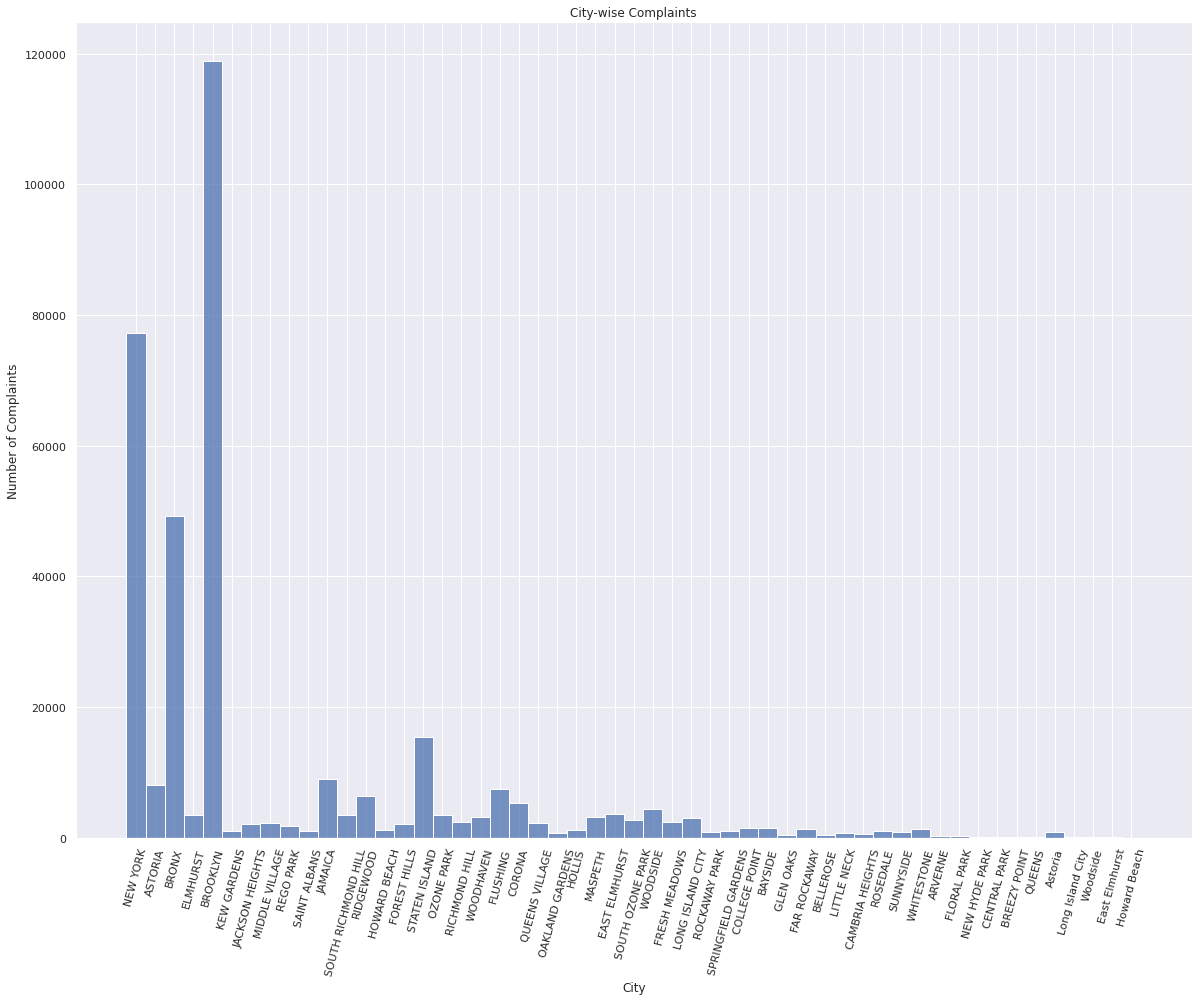

In [ ]:
sns.histplot(data=nyc, x='City', stat='count')
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=75)
plt.title('City-wise Complaints')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.show()

# **2.2 Draw scatter and hexbin plots for complaint concentration across Brooklyn**

In [ ]:
brooklyn_complaints = nyc[nyc['Borough'] == 'BROOKLYN']

In [ ]:
complaint_counts = brooklyn_complaints.groupby(['Longitude', 'Latitude']).size().reset_index(name='count')

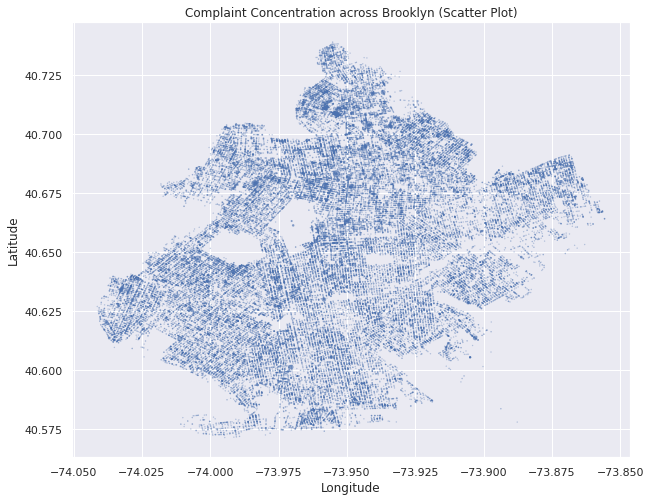

In [ ]:
# create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(complaint_counts['Longitude'], complaint_counts['Latitude'], s=complaint_counts['count']/10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Complaint Concentration across Brooklyn (Scatter Plot)')
plt.show()

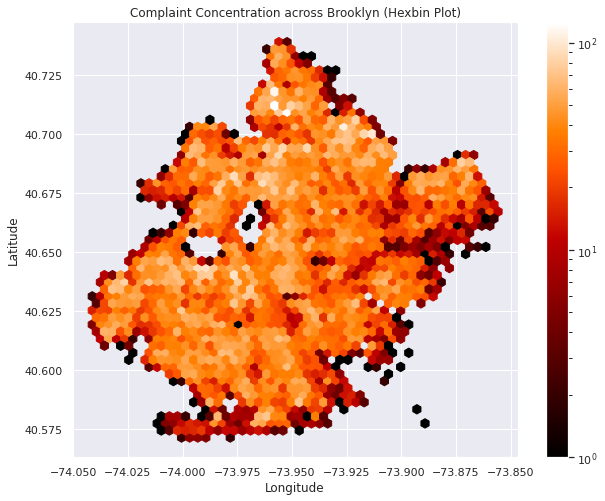

In [ ]:
plt.figure(figsize=(10, 8))
plt.hexbin(complaint_counts['Longitude'], complaint_counts['Latitude'], gridsize=50, bins='log', cmap='gist_heat')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Complaint Concentration across Brooklyn (Hexbin Plot)')
plt.colorbar()
plt.show()

# **3. Find major types of complaints:**
# **3.1 Plot a bar graph of count vs. complaint types**

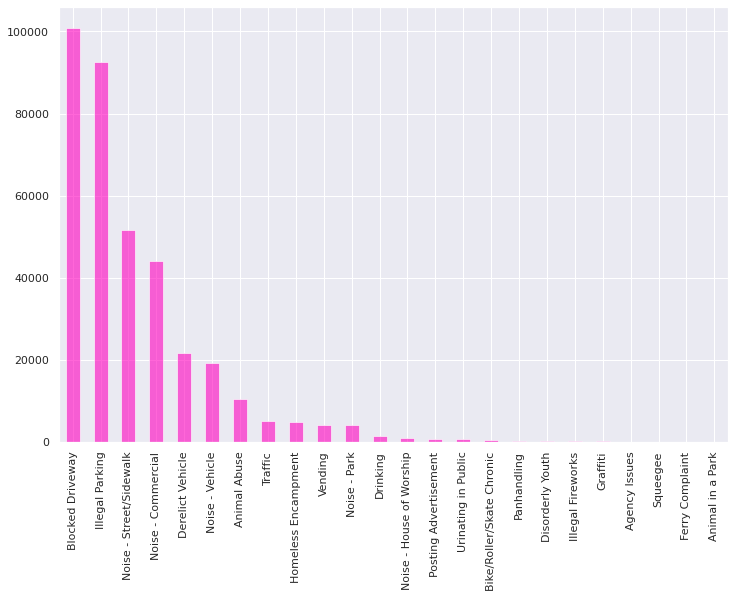

In [ ]:
nyc['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(12,8),cmap='gist_rainbow_r')
plt.show()

# **3.2 Find the top 10 types of complaints**

In [ ]:
nyc['Complaint Type'].value_counts().nlargest(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

In [ ]:
complaint_counts_by_city = nyc.groupby(['City', 'Complaint Type']).size().reset_index(name='count')


In [ ]:
# Create a new dataset for each city
cities = complaint_counts_by_city['City'].unique()
for city in cities:
    city_df = complaint_counts_by_city[complaint_counts_by_city['City'] == city]

In [ ]:
city_df

,City,Complaint Type,count
772,Woodside,Blocked Driveway,27
773,Woodside,Derelict Vehicle,8
774,Woodside,Illegal Parking,124
775,Woodside,Noise - Commercial,2
776,Woodside,Noise - Street/Sidewalk,5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


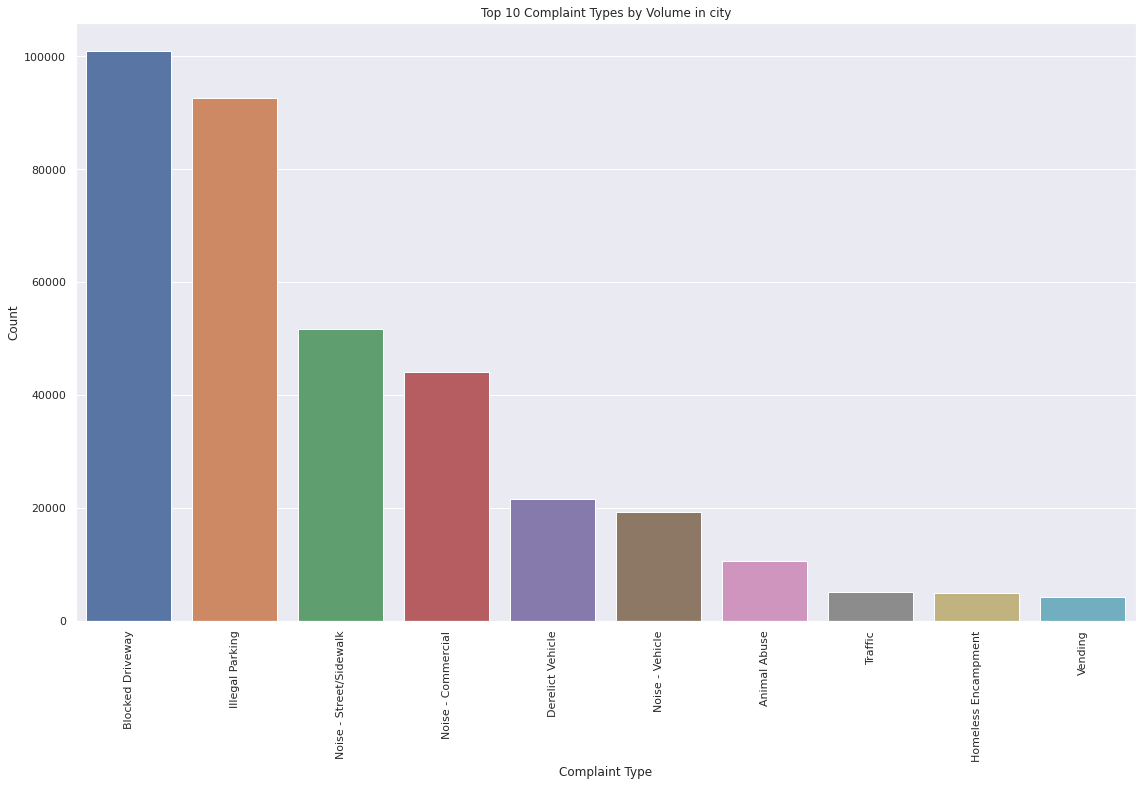

In [ ]:
# Create a bar chart showing the top 10 types of complaints and their counts
complaint_counts = nyc['Complaint Type'].value_counts().head(10)
plt.figure(figsize=(19,11))
sns.barplot(complaint_counts.index, complaint_counts.values)
plt.title('Top 10 Complaint Types by Volume in city')
plt.xticks(rotation=45)
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **3.3 Display the types of complaints in each city in a separate dataset**

In [ ]:
# Create a pivot table of the complaints by city dataset
complaints_by_city_pivot = complaints_by_city.pivot(index='City', columns='Complaint Type', values='Count')

In [ ]:
complaints_by_city_pivot

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,NaN,46.0,NaN,NaN,50.0,32.0,2.0,1.0,NaN,1.0,...,14.0,2.0,29.0,10.0,1.0,NaN,NaN,1.0,1.0,1.0
ASTORIA,NaN,170.0,NaN,16.0,3436.0,426.0,5.0,43.0,NaN,4.0,...,21.0,64.0,409.0,236.0,2.0,3.0,NaN,60.0,10.0,57.0
Astoria,NaN,NaN,NaN,NaN,159.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,NaN,53.0,NaN,NaN,514.0,231.0,2.0,1.0,NaN,3.0,...,3.0,4.0,17.0,24.0,NaN,NaN,NaN,9.0,NaN,2.0
BELLEROSE,NaN,15.0,NaN,1.0,138.0,120.0,2.0,1.0,NaN,NaN,...,1.0,1.0,13.0,11.0,1.0,1.0,NaN,9.0,1.0,NaN
BREEZY POINT,NaN,2.0,NaN,NaN,3.0,3.0,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,NaN,1971.0,NaN,22.0,17063.0,2403.0,66.0,206.0,NaN,15.0,...,90.0,548.0,9146.0,3556.0,20.0,18.0,NaN,427.0,54.0,433.0
BROOKLYN,8.0,3203.0,NaN,129.0,36780.0,6460.0,79.0,299.0,2.0,60.0,...,391.0,1601.0,14622.0,6024.0,52.0,59.0,NaN,1261.0,155.0,582.0
CAMBRIA HEIGHTS,NaN,15.0,NaN,NaN,177.0,148.0,NaN,NaN,NaN,NaN,...,2.0,NaN,29.0,100.0,NaN,NaN,NaN,7.0,NaN,NaN


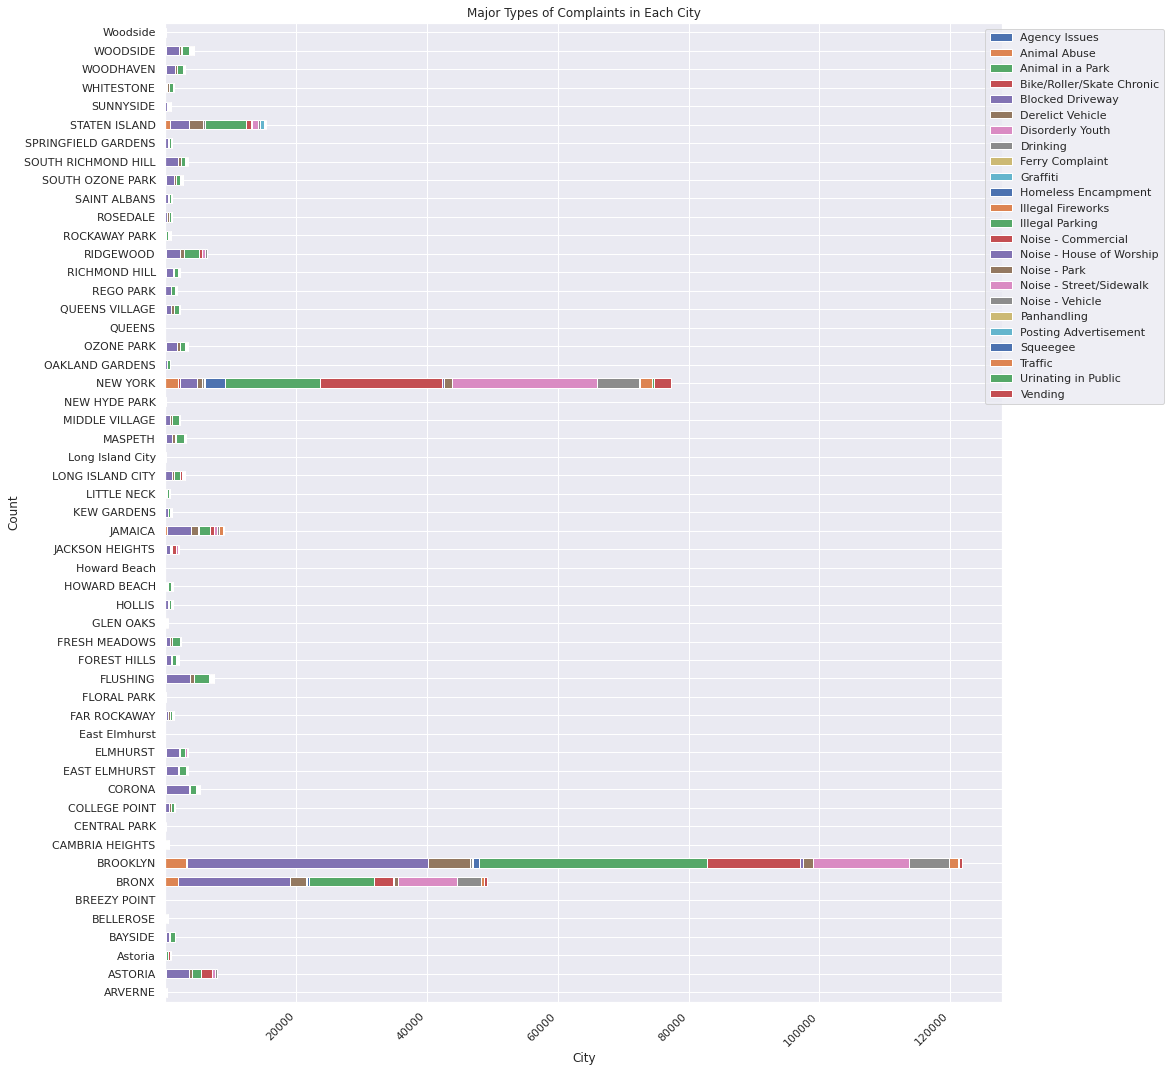

In [ ]:
# Create a stacked bar chart of the pivot table
complaints_by_city_pivot.plot(kind='barh', stacked=True, figsize=(15, 18))
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Major Types of Complaints in Each City')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

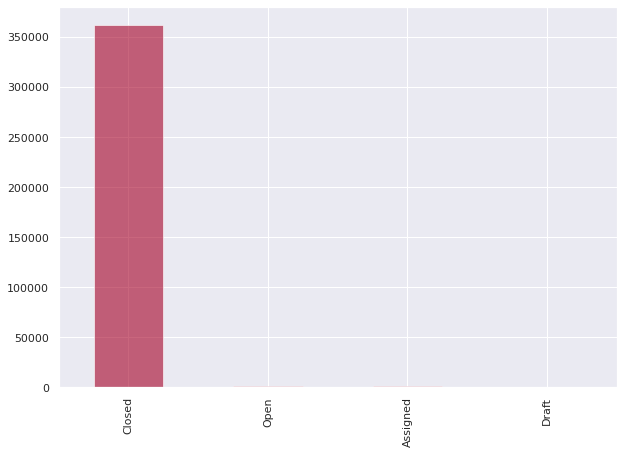

In [ ]:
nyc['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(10,7),cmap='RdYlGn')
plt.show()

In [ ]:
nyc['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [ ]:
#Group dataset by complaint type to display plot against city
groupedby_complainttype = nyc.groupby('Complaint Type')
grp_data = groupedby_complainttype.get_group('Homeless Encampment')
grp_data.shape

(4879, 14)

In [ ]:
groupedby_complainttype = nyc.groupby('Complaint Type')
grp_data1 = groupedby_complainttype.get_group('Blocked Driveway')
grp_data1.shape

(100881, 14)

In [ ]:
nyc['City'].dropna(inplace=True)

In [ ]:
nyc['City'].shape

(364558,)

In [ ]:
nyc['City'].isnull().sum()

2997

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
nyc['City'] = imputer.fit_transform(nyc[['City']])

In [ ]:
nyc['City'].isnull().sum()

0

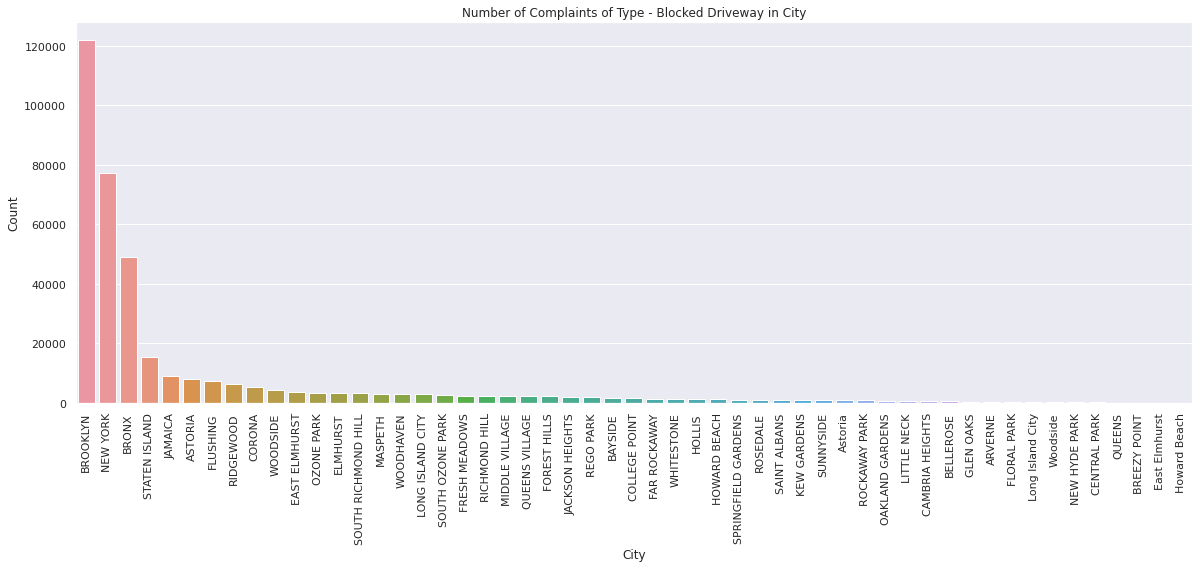

In [ ]:
plt.figure(figsize=(20, 7))
grp_data = nyc[nyc['Complaint Type'] == 'Blocked Driveway']
city_counts = nyc['City'].value_counts()
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Complaints of Type - Blocked Driveway in City')
plt.show()

In [ ]:
nyc['Location Type'].fillna('Unknown Loc', inplace =True)

In [ ]:
nyc['Location Type'].values

array(['Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk', ...,
       'Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk'],
      dtype=object)

In [ ]:
nyc['Location Type'].isnull().sum()

0

# **4. Visualize the major types of complaints in each city**

In [ ]:
complaints_by_city = nyc.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')
print(complaints_by_city)

         City           Complaint Type  Count
0     ARVERNE             Animal Abuse     46
1     ARVERNE         Blocked Driveway     50
2     ARVERNE         Derelict Vehicle     32
3     ARVERNE         Disorderly Youth      2
4     ARVERNE                 Drinking      1
..        ...                      ...    ...
774  Woodside         Blocked Driveway     27
775  Woodside         Derelict Vehicle      8
776  Woodside          Illegal Parking    124
777  Woodside       Noise - Commercial      2
778  Woodside  Noise - Street/Sidewalk      5

[779 rows x 3 columns]


# **5. Check if the average response time across various types of complaints**

In [ ]:
# Convert the 'Created Date' and 'Closed Date' columns to datetime format
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'])
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'])

# Calculate the Request Closing Time in seconds and assign the values to a new column
nyc.loc[:, 'Request_Closing_Time'] = (nyc['Closed Date'] - nyc['Created Date']).dt.total_seconds()

# Group the data by complaint type and calculate the mean of the Request Closing Time for each group
complaints_mean = nyc.groupby('Complaint Type')['Request_Closing_Time'].mean()

# Print the average response time for each complaint type
print(complaints_mean)


Complaint Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Ferry Complaint                       NaN
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending            

In [ ]:
response_time_by_type = nyc.groupby('Complaint Type')['Request_Closing_Time'].mean().reset_index(name='Avg Response Time')

In [ ]:
response_time_by_type

,Complaint Type,Avg Response Time
0,Agency Issues,1.828912e+04
1,Animal Abuse,1.803256e+04
2,Animal in a Park,1.212634e+06
3,Bike/Roller/Skate Chronic,1.312369e+04
4,Blocked Driveway,1.623252e+04
5,Derelict Vehicle,2.535960e+04
6,Disorderly Youth,1.236375e+04
7,Drinking,1.382130e+04
8,Ferry Complaint,NaN
9,Graffiti,2.327634e+04


# **6. Identify significant variables by performing a statistical analysis using p-values and chi-square values**

In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
nyc.dropna(inplace=True)

In [ ]:
import scipy.stats as stats

complaint_types = nyc['Complaint Type'].unique()

complaint_type_groups = []

for complaint_type in complaint_types:
    complaint_type_groups.append(nyc[nyc['Complaint Type'] == complaint_type]['Request_Closing_Time'].dropna())

stats.f_oneway(*complaint_type_groups)

F_onewayResult(statistic=642.4245246869907, pvalue=0.0)

# **Assignment 2**

# **Analyze the date column and remove the entries if it has an incorrect timeline**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
nyc = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer

In [ ]:
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'])
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'])

In [ ]:
nyc['Closed Date'].isnull().sum()

2381

## **2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.**

In [ ]:
nyc.loc[:, 'Request_Closing_Time'] = (nyc['Closed Date'] - nyc['Created Date']).dt.total_seconds()
nyc.loc[:, 'Request_Closing_Time_Formatted'] = pd.to_datetime(nyc['Request_Closing_Time'], unit='s').dt.strftime('%H:%M:%S')
print(nyc.head())

   Unique Key        Created Date         Closed Date Agency  \
0    32310363 2015-12-31 23:59:45 2016-01-01 00:55:15   NYPD   
1    32309934 2015-12-31 23:59:44 2016-01-01 01:26:57   NYPD   
2    32309159 2015-12-31 23:59:29 2016-01-01 04:51:03   NYPD   
3    32305098 2015-12-31 23:57:46 2016-01-01 07:43:13   NYPD   
4    32306529 2015-12-31 23:56:58 2016-01-01 03:24:42   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department         Blocked Driveway   
2  New York City Police Department         Blocked Driveway   
3  New York City Police Department          Illegal Parking   
4  New York City Police Department          Illegal Parking   

                     Descriptor    Location Type  Incident Zip  \
0              Loud Music/Party  Street/Sidewalk       10034.0   
1                     No Access  Street/Sidewalk       11105.0   
2                     No Access  Stree

In [ ]:
nyc['Request_Closing_Time']

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Request_Closing_Time, Length: 364558, dtype: float64

In [ ]:
nyc['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [ ]:
nyc.groupby(['Borough', 'Complaint Type'])['Request_Closing_Time'].mean().sort_values()

Borough        Complaint Type          
STATEN ISLAND  Posting Advertisement       5.565486e+03
MANHATTAN      Illegal Fireworks           7.290000e+03
               Noise - House of Worship    8.009207e+03
               Disorderly Youth            8.133420e+03
QUEENS         Illegal Fireworks           8.358105e+03
                                               ...     
Unspecified    Animal in a Park            1.212634e+06
               Ferry Complaint                      NaN
               Noise - House of Worship             NaN
               Posting Advertisement                NaN
               Traffic                              NaN
Name: Request_Closing_Time, Length: 119, dtype: float64

# **4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.**

In [ ]:
response_time_by_type = nyc.groupby('Complaint Type')['Request_Closing_Time'].mean().reset_index(name='Avg Response Time')

In [ ]:
print(response_time_by_type)

               Complaint Type  Avg Response Time
0               Agency Issues       1.828912e+04
1                Animal Abuse       1.803256e+04
2            Animal in a Park       1.212634e+06
3   Bike/Roller/Skate Chronic       1.312369e+04
4            Blocked Driveway       1.623252e+04
5            Derelict Vehicle       2.535960e+04
6            Disorderly Youth       1.236375e+04
7                    Drinking       1.382130e+04
8             Ferry Complaint                NaN
9                    Graffiti       2.327634e+04
10        Homeless Encampment       1.545138e+04
11          Illegal Fireworks       1.011348e+04
12            Illegal Parking       1.565044e+04
13         Noise - Commercial       1.108576e+04
14   Noise - House of Worship       1.139109e+04
15               Noise - Park       1.222606e+04
16    Noise - Street/Sidewalk       1.223130e+04
17            Noise - Vehicle       1.256180e+04
18                Panhandling       1.585355e+04
19      Posting Adve

In [ ]:
nyc

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_Formatted,Month,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0,00:55:30,12,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0,01:27:13,12,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0,04:51:34,12,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0,07:45:27,12,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0,03:27:44,12,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",37067.0,10:17:47,1,0
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",8434.0,02:20:34,1,0
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",1143.0,00:19:03,1,0
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",9653.0,02:40:53,1,0


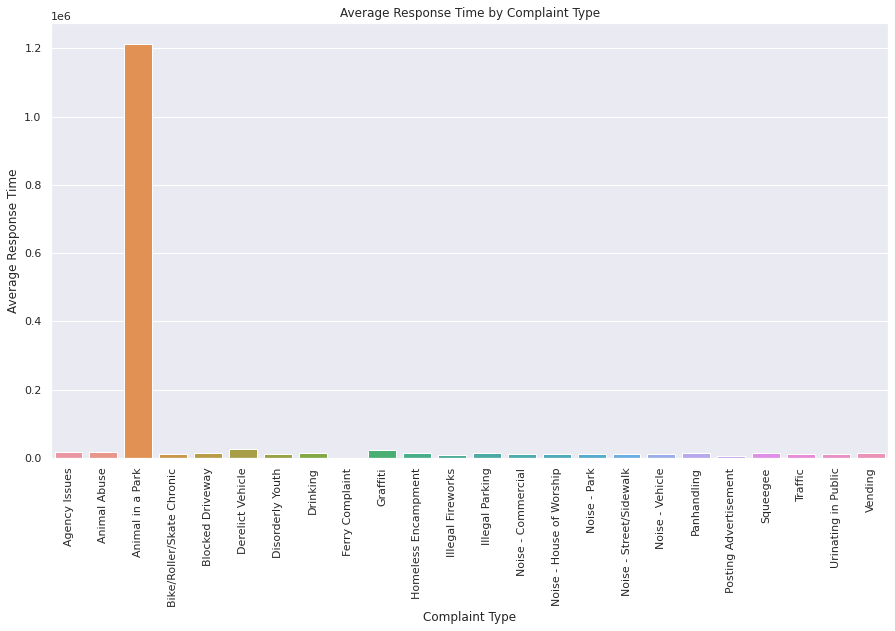

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Complaint Type', y='Avg Response Time', data=response_time_by_type)
plt.xticks(rotation=90)
plt.xlabel('Complaint Type')
plt.ylabel('Average Response Time')
plt.title('Average Response Time by Complaint Type')
plt.show()

In [ ]:
nyc['City'].isnull().sum()

2997

In [ ]:
nyc['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [ ]:
print(nyc['Complaint Type'].isnull().sum())

0


In [ ]:
city_complaints = nyc['City'].value_counts()

In [ ]:
complaint_type_counts = nyc['Complaint Type'].value_counts()

In [ ]:
complaint_type_counts

Animal in a Park                  1
Ferry Complaint                   2
Squeegee                          4
Agency Issues                     8
Graffiti                        157
Illegal Fireworks               172
Disorderly Youth                315
Panhandling                     327
Bike/Roller/Skate Chronic       478
Urinating in Public             641
Posting Advertisement           681
Noise - House of Worship       1070
Drinking                       1409
Noise - Park                   4109
Vending                        4192
Homeless Encampment            4879
Traffic                        5198
Animal Abuse                  10541
Noise - Vehicle               19352
Derelict Vehicle              21661
Noise - Commercial            44109
Noise - Street/Sidewalk       51692
Illegal Parking               92679
Blocked Driveway             100881
Name: Complaint Type, dtype: int64

# **3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


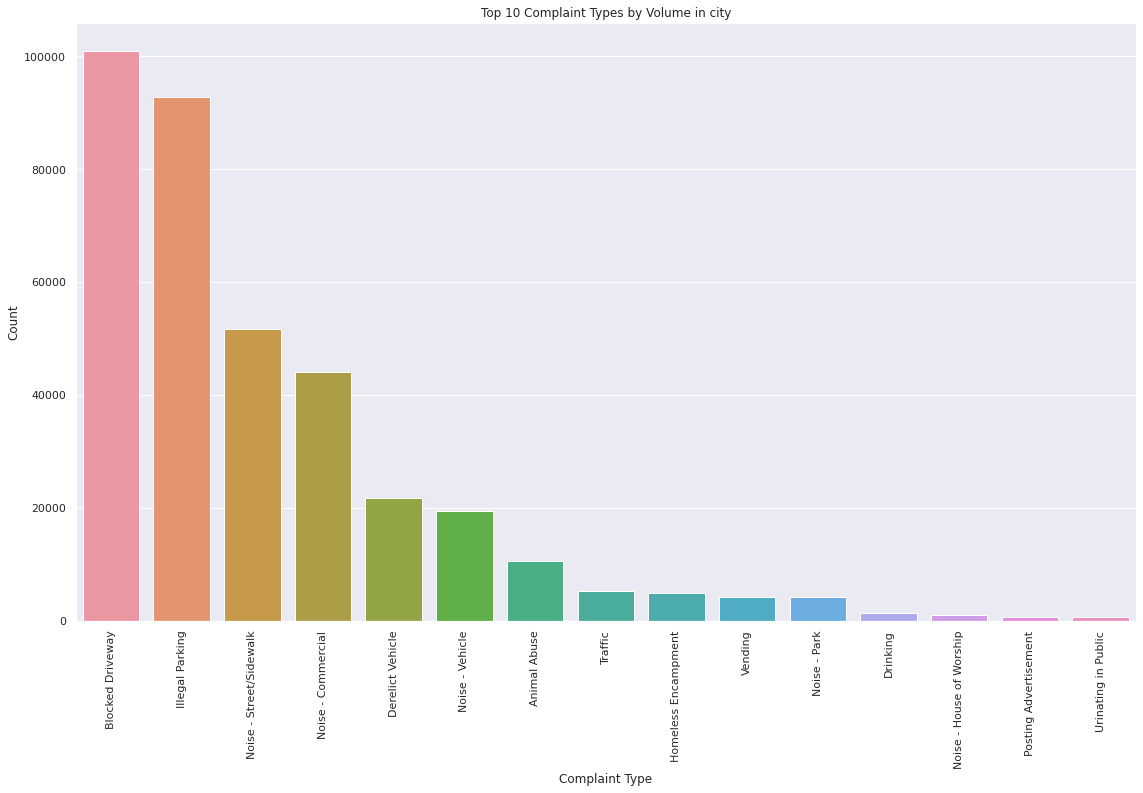

In [ ]:
# create bar chart of complaint types by volume
complaint_counts = nyc['Complaint Type'].value_counts().head(15)
plt.figure(figsize=(19,11))
sns.barplot(complaint_counts.index, complaint_counts.values)
plt.title('Top 10 Complaint Types by Volume in city')
plt.xticks(rotation=45)
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
complaints_by_city = nyc.groupby(['City', 'Complaint Type']).size().reset_index(name='Count')
print(complaints_by_city)

         City           Complaint Type  Count
0     ARVERNE             Animal Abuse     46
1     ARVERNE         Blocked Driveway     50
2     ARVERNE         Derelict Vehicle     32
3     ARVERNE         Disorderly Youth      2
4     ARVERNE                 Drinking      1
..        ...                      ...    ...
772  Woodside         Blocked Driveway     27
773  Woodside         Derelict Vehicle      8
774  Woodside          Illegal Parking    124
775  Woodside       Noise - Commercial      2
776  Woodside  Noise - Street/Sidewalk      5

[777 rows x 3 columns]


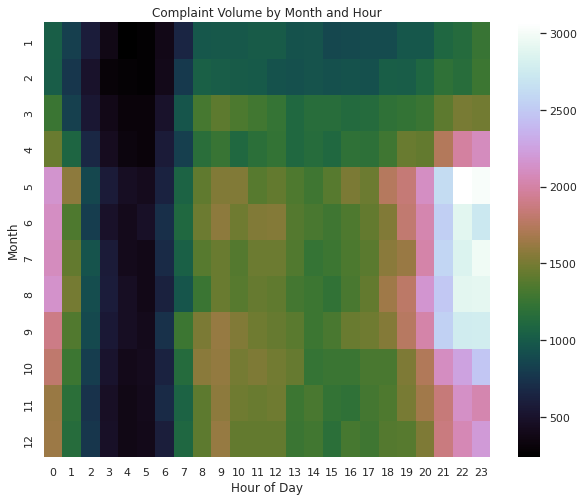

In [ ]:
# create heat map of complaint volume by month and hour
nyc['Month'] = nyc['Created Date'].dt.month
nyc['Hour'] = nyc['Created Date'].dt.hour
complaint_counts = nyc.pivot_table(values='Unique Key', index='Month', columns='Hour', aggfunc='count')
plt.figure(figsize=(10,8))
sns.heatmap(complaint_counts, cmap='cubehelix')
plt.title('Complaint Volume by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()

In [ ]:
nyc

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_Formatted,Month,Hour
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0,00:55:30,12,23
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0,01:27:13,12,23
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0,04:51:34,12,23
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0,07:45:27,12,23
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0,03:27:44,12,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",37067.0,10:17:47,1,0
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",8434.0,02:20:34,1,0
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",1143.0,00:19:03,1,0
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",9653.0,02:40:53,1,0


In [ ]:
nyc.shape

(364558, 57)

In [ ]:
nyc.describe

<bound method NDFrame.describe of         Unique Key        Created Date         Closed Date Agency  \
0         32310363 2015-12-31 23:59:45 2016-01-01 00:55:15   NYPD   
1         32309934 2015-12-31 23:59:44 2016-01-01 01:26:57   NYPD   
2         32309159 2015-12-31 23:59:29 2016-01-01 04:51:03   NYPD   
3         32305098 2015-12-31 23:57:46 2016-01-01 07:43:13   NYPD   
4         32306529 2015-12-31 23:56:58 2016-01-01 03:24:42   NYPD   
...            ...                 ...                 ...    ...   
364553    29609918 2015-01-01 00:04:44 2015-01-01 10:22:31   NYPD   
364554    29608392 2015-01-01 00:04:28 2015-01-01 02:25:02   NYPD   
364555    29607589 2015-01-01 00:01:30 2015-01-01 00:20:33   NYPD   
364556    29610889 2015-01-01 00:01:29 2015-01-01 02:42:22   NYPD   
364557    29611816 2015-01-01 00:00:50 2015-01-01 02:47:50   NYPD   

                            Agency Name           Complaint Type  \
0       New York City Police Department  Noise - Street/Sidewalk   
1

In [ ]:
cols = ['Complaint Type', 'Incident Zip', 'Borough', 'Latitude', 'Longitude', 'Request_Closing_Time', 'Status']


In [ ]:
nyc_subset = nyc[cols].dropna()

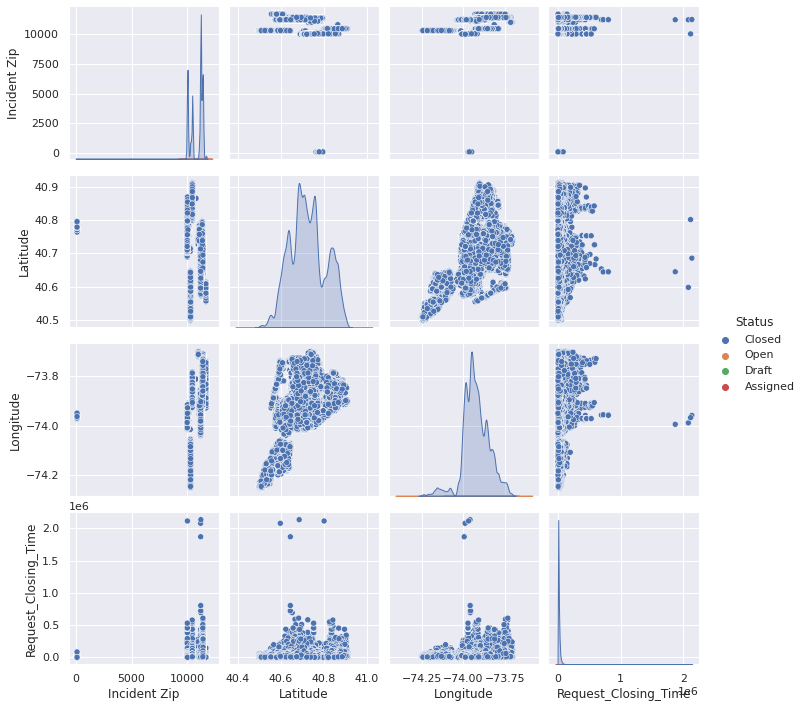

In [ ]:
sns.pairplot(nyc_subset, hue='Status')
plt.show()

5Perform a statistical test for the following:
1 Whether the average response time across complaint types is similar or not

In [ ]:

from scipy.stats import f_oneway


# subset data
subset = nyc[['Complaint Type', 'Request_Closing_Time']]

# perform ANOVA test
f_stat, p_val = f_oneway(*(subset[subset['Complaint Type'] == c]['Request_Closing_Time'] for c in subset['Complaint Type'].unique()))

# interpret results
if p_val < 0.05:
    print("There is a significant difference in average response time across different complaint types.")
else:
    print("There is not enough evidence to suggest a significant difference in average response time across different complaint types.")


There is not enough evidence to suggest a significant difference in average response time across different complaint types.


5.2 Are the type of complaint or service requested and location related

In [ ]:
from scipy.stats import chi2_contingency
# subset data
subset1 = nyc[['Complaint Type', 'Borough']]

# create contingency table
contingency_table = pd.crosstab(subset1['Complaint Type'], subset1['Borough'])

# perform Chi-Square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# interpret results
if p_val < 0.05:
    print("There is a significant association between the type of complaint or service requested and location.")
else:
    print("There is not enough evidence to suggest an association between the type of complaint or service requested and location.")


There is a significant association between the type of complaint or service requested and location.
